In [1]:
#Importing the necessary libraries

#Numerical Calculations and Dataframe

import numpy as np
import pandas as pd

#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

#Scaling

from sklearn.preprocessing import StandardScaler

#Splitting the data

from sklearn.model_selection import train_test_split

#Hyper-Parameter Tuning

from sklearn.model_selection import GridSearchCV

#Importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree

#Statistical calculations
import scipy.stats as stats

#Model evaluation

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the data
df=pd.read_csv('Diab data.csv')

# Attributes Description:

* Age (1-20 to 65): Age range of the individuals.
* Sex (1. Male, 2. Female): Gender information.
* Polyuria (1. Yes, 2. No): Presence of excessive urination.
* Polydipsia (1. Yes, 2. No): Excessive thirst.
* Sudden Weight Loss (1. Yes, 2. No): Abrupt weight loss.
* Weakness (1. Yes, 2. No): Generalized weakness.
* Polyphagia (1. Yes, 2. No): Excessive hunger.
* Genital Thrush (1. Yes, 2. No): Presence of genital thrush.
* Visual Blurring (1. Yes, 2. No): Blurring of vision.
* Itching (1. Yes, 2. No): Presence of itching.
* Irritability (1. Yes, 2. No): Display of irritability.
* Delayed Healing (1. Yes, 2. No): Delayed wound healing.
* Partial Paresis (1. Yes, 2. No): Partial loss of voluntary movement.
* Muscle Stiffness (1. Yes, 2. No): Presence of muscle stiffness.
* Alopecia (1. Yes, 2. No): Hair loss.
* Obesity (1. Yes, 2. No): Presence of obesity.
* Class (1. Positive, 2. Negative): Diabetes classification.

In [3]:
#First five rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#No of rows and columns in the data
print(f'No of rows : {df.shape[0]}')
print(f'No of columns : {df.shape[1]}')

No of rows : 520
No of columns : 17


In [5]:
#Checking for null values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

* Observations:
    * The data does not have null values.

## Univariate Analysis

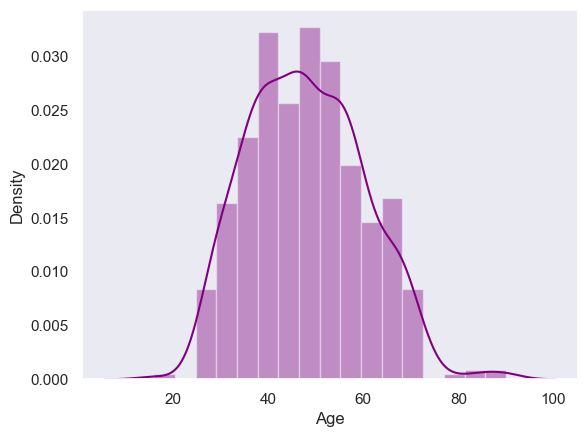

In [6]:
#For numeric variable
sns.set(style='dark')
sns.distplot(df['Age'],color='purple')
plt.show()


* Observation:
    * Age variable is normally distributed.

In [7]:
#Categorical Variables
df_cat=df.select_dtypes(include='object')


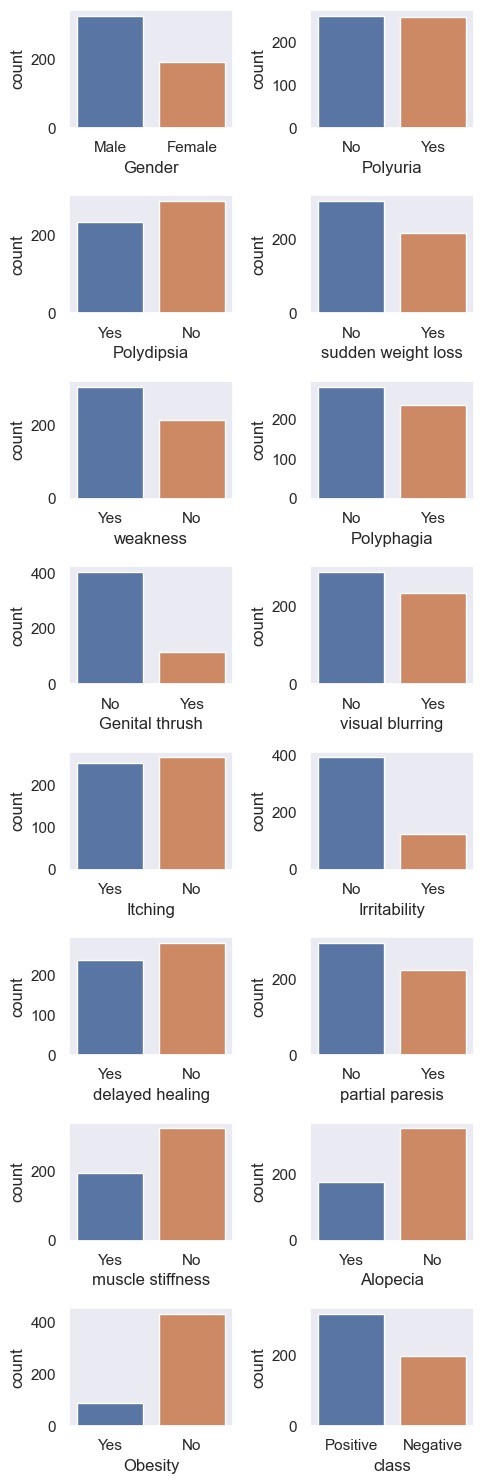

In [8]:
plt.figure(figsize=(5,15))
t=1
for i in df_cat:
    plt.subplot(8,2,t)
    sns.countplot(x=df_cat[i])
    plt.tight_layout()
    t+=1

## Bivariate Analysis - Visualization + Statistical Tests

In [9]:
#Age vs class
df.groupby('class')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,200.0,46.360000,12.080983,26.0,37.0,45.0,55.0,72.0
Positive,320.0,49.071875,12.097481,16.0,39.0,48.0,57.0,90.0


* Observations :
    * The median age for individuals with/without diabetes is almost similar.
    * We will now check the distribution of age.

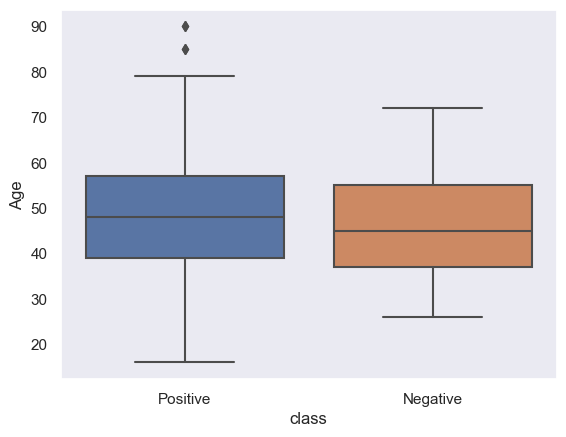

In [10]:
sns.boxplot(x=df['class'],y=df['Age'])
plt.show()

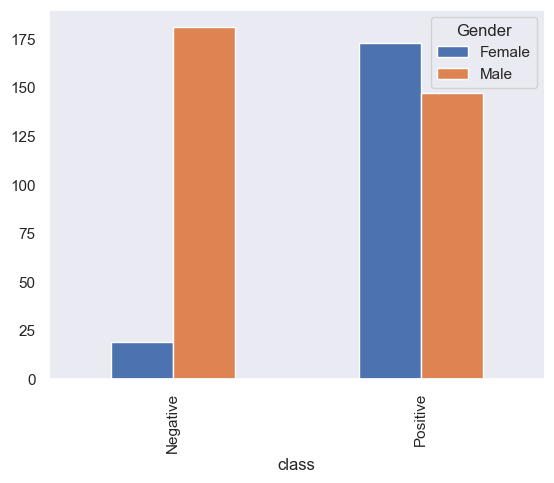

In [11]:
#Gender vs class
pd.crosstab(df['class'],df['Gender']).plot(kind='bar')
plt.show()

* Observations :
    * Those tested positive, a higher number of individuals were females.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Gender is related to class.

In [12]:
cross=pd.crosstab(df['class'],df['Gender'])

In [13]:
p_value=stats.chi2_contingency(cross)[1]

In [14]:
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Gender is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Gender is related to class')

Fail to reject the Null Hypothesis
Gender is related to class


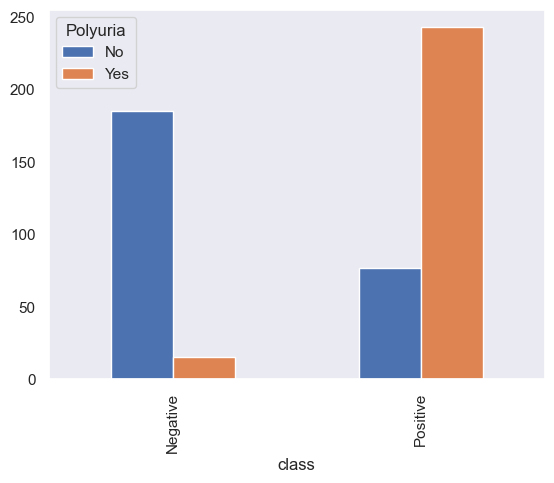

In [15]:
#Polyuria vs class
pd.crosstab(df['class'],df['Polyuria']).plot(kind='bar')
plt.show()

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of Polyuria.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Polyuria is related to class.

In [16]:
cross=pd.crosstab(df['class'],df['Polyuria'])
p_value=stats.chi2_contingency(cross)[1]

In [17]:
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Polyuria is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Polyuria is related to class')

Fail to reject the Null Hypothesis
Polyuria is related to class


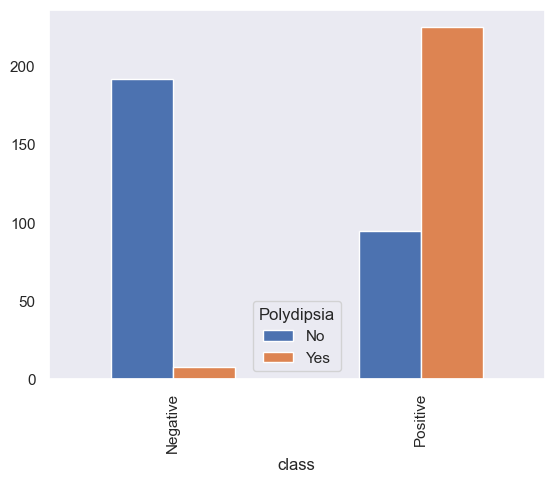

In [18]:
#Polydipsia vs class
pd.crosstab(df['class'],df['Polydipsia']).plot(kind='bar')
plt.show()

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of Polydipsia.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Polydipsia is related to class.

In [19]:
cross=pd.crosstab(df['class'],df['Polydipsia'])

In [20]:
p_value=stats.chi2_contingency(cross)[1]

In [21]:
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Polydipsia is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Polydipsia is related to class')

Fail to reject the Null Hypothesis
Polydipsia is related to class


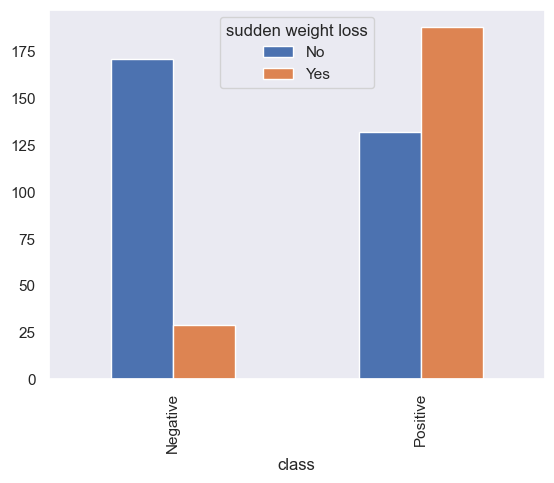

In [22]:
#sudden weight loss vs class
pd.crosstab(df['class'],df['sudden weight loss']).plot(kind='bar')
plt.show()

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of sudden weight loss.

#### Hypothesis Testing -  Chi-Square Test
* Checking if sudden weight loss is related to class.

In [23]:
cross=pd.crosstab(df['class'],df['sudden weight loss'])
p_value=stats.chi2_contingency(cross)[1]

In [24]:
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('sudden weight loss is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('sudden weight loss is related to class')

Fail to reject the Null Hypothesis
sudden weight loss is related to class


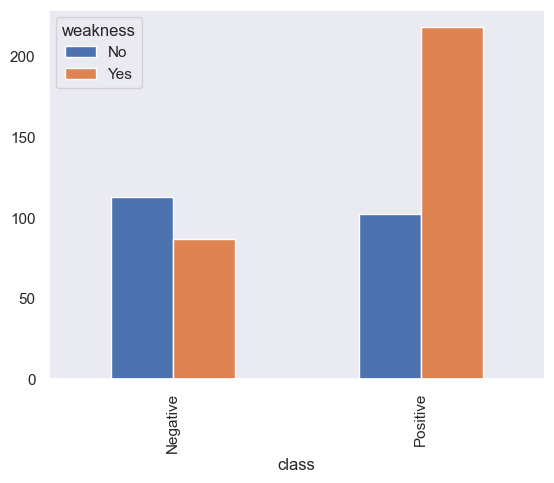

In [25]:
#weakness vs class
pd.crosstab(df['class'],df['weakness']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of weakness.

#### Hypothesis Testing -  Chi-Square Test
* Checking if weakness is related to class.

In [26]:
cross=pd.crosstab(df['class'],df['weakness'])
p_value=stats.chi2_contingency(cross)[1]

In [27]:
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Weakness is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Weakness is related to class')

Fail to reject the Null Hypothesis
Weakness is related to class


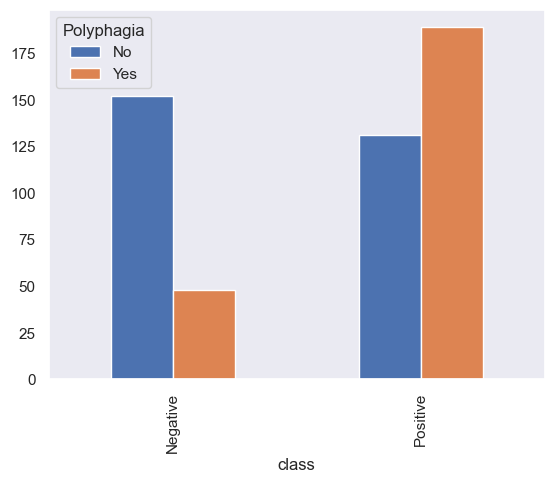

In [28]:
#Polyphagia vs class
pd.crosstab(df['class'],df['Polyphagia']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of Polyphagia.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Polyphagia is related to class.

In [29]:
cross=pd.crosstab(df['class'],df['Polyphagia'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Polyphagia is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Polyphagia is related to class')

Fail to reject the Null Hypothesis
Polyphagia is related to class


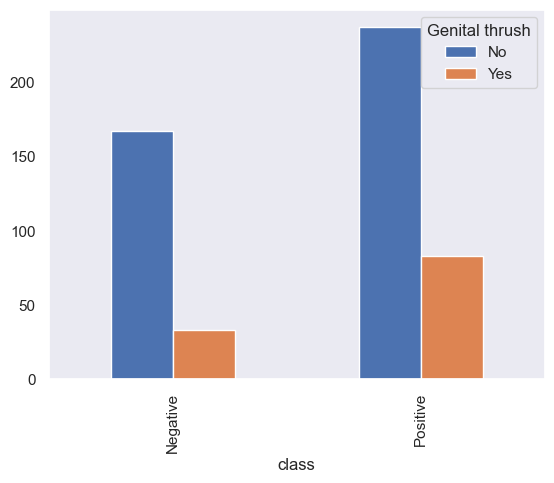

In [30]:
#Genital thrush vs class
pd.crosstab(df['class'],df['Genital thrush']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of Genital thrush.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Genital thrush is related to class.

In [31]:
cross=pd.crosstab(df['class'],df['Genital thrush'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Genital thrush is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Genital thrush is related to class')

Fail to reject the Null Hypothesis
Genital thrush is related to class


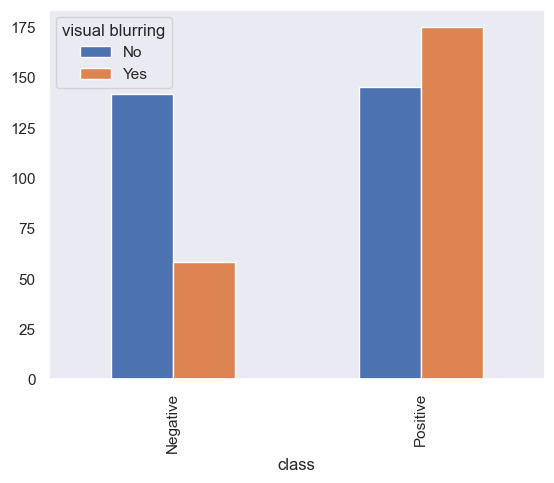

In [32]:
#visual blurring vs class
pd.crosstab(df['class'],df['visual blurring']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of visual blurring.

#### Hypothesis Testing -  Chi-Square Test
* Checking if visual blurring is related to class.

In [33]:
cross=pd.crosstab(df['class'],df['visual blurring'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('visual blurring is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('visual blurring is related to class')

Fail to reject the Null Hypothesis
visual blurring is related to class


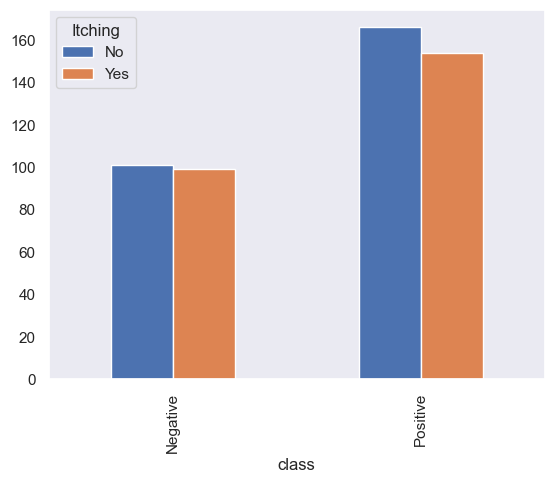

In [34]:
#Itching vs class
pd.crosstab(df['class'],df['Itching']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of Itching.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Itching is related to class.

In [35]:
cross=pd.crosstab(df['class'],df['Itching'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Itching is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Itching is related to class')

Accept the Null Hypothesis
Itching is not related to class


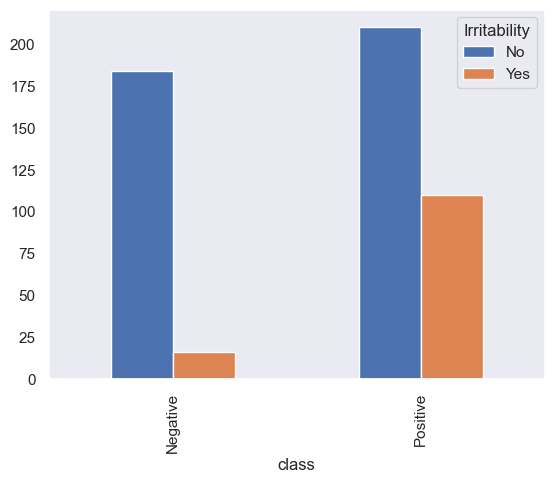

In [36]:
#Irritability vs class
pd.crosstab(df['class'],df['Irritability']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of Irritability.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Irritability is related to class.

In [37]:
cross=pd.crosstab(df['class'],df['Irritability'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Irritability is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Irritability is related to class')

Fail to reject the Null Hypothesis
Irritability is related to class


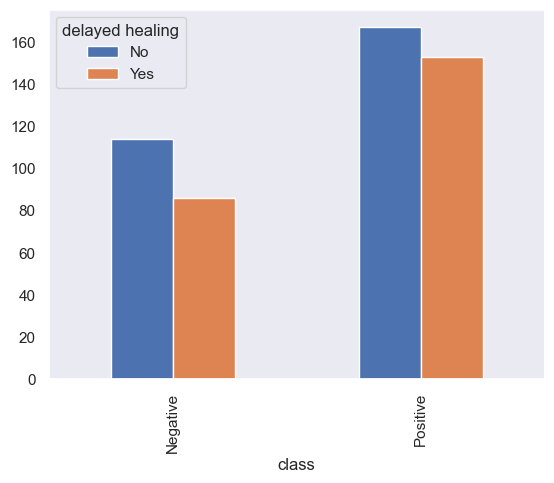

In [38]:
#delayed healing vs class
pd.crosstab(df['class'],df['delayed healing']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of delayed healing.

#### Hypothesis Testing -  Chi-Square Test
* Checking if delayed healing is related to class.

In [39]:
cross=pd.crosstab(df['class'],df['delayed healing'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('delayed healing is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('delayed healing is related to class')

Accept the Null Hypothesis
delayed healing is not related to class


* Observation :
    * Delayed hearing has been statistically proven to be not related to class.

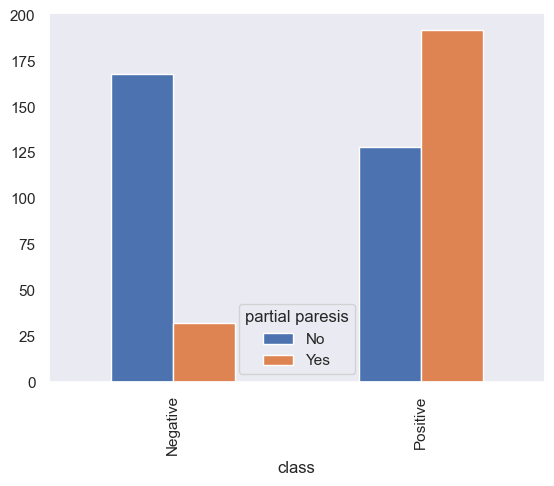

In [40]:
#partial paresis vs class
pd.crosstab(df['class'],df['partial paresis']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals had symptoms of partial paresis.

#### Hypothesis Testing -  Chi-Square Test
* Checking if partial paresis is related to class.

In [41]:
cross=pd.crosstab(df['class'],df['partial paresis'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('partial paresis is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('partial paresis is related to class')

Fail to reject the Null Hypothesis
partial paresis is related to class


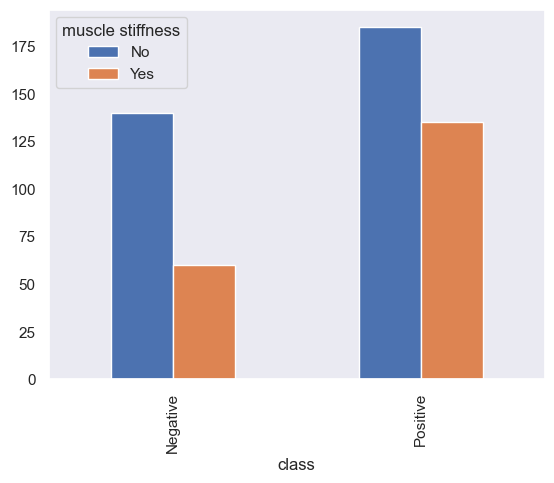

In [42]:
#muscle stiffness vs class
pd.crosstab(df['class'],df['muscle stiffness']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of muscle stiffness.

#### Hypothesis Testing -  Chi-Square Test
* Checking if muscle stiffness is related to class.

In [43]:
cross=pd.crosstab(df['class'],df['muscle stiffness'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('muscle stiffness is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('muscle stiffness is related to class')

Fail to reject the Null Hypothesis
muscle stiffness is related to class


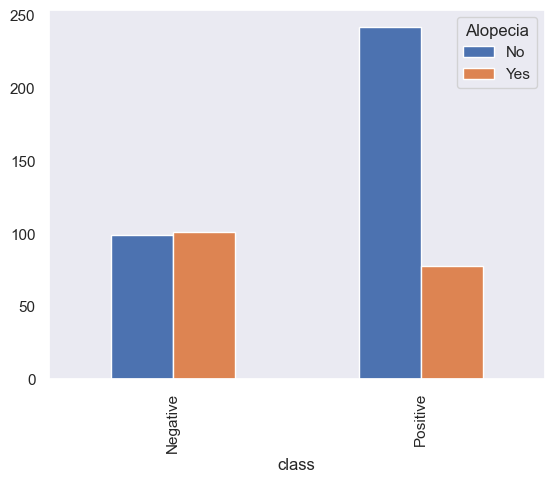

In [44]:
#Alopecia vs class
pd.crosstab(df['class'],df['Alopecia']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have symptoms of Alopecia.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Alopecia is related to class.

In [45]:
cross=pd.crosstab(df['class'],df['Alopecia'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Alopecia is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Alopecia is related to class')

Fail to reject the Null Hypothesis
Alopecia is related to class


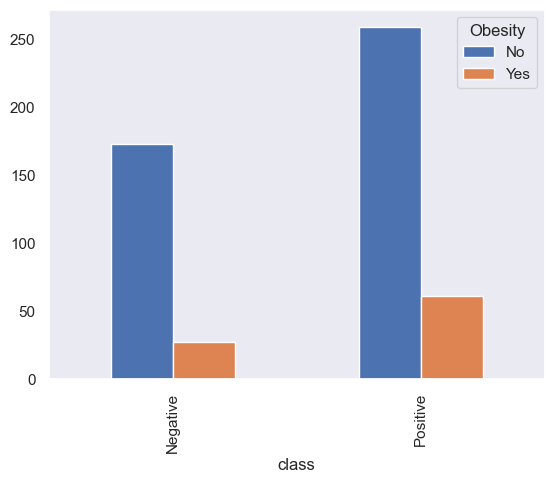

In [46]:
#Obesity vs class
pd.crosstab(df['class'],df['Obesity']).plot(kind='bar')
plt.show()
    

* Observations :
    * Those tested positive, a higher number of individuals did not have Obesity.

#### Hypothesis Testing -  Chi-Square Test
* Checking if Obesity is related to class.

In [47]:
cross=pd.crosstab(df['class'],df['Obesity'])
p_value=stats.chi2_contingency(cross)[1]
if p_value > 0.05:
    print('Accept the Null Hypothesis')
    print('Obesity is not related to class')
else:
    print('Fail to reject the Null Hypothesis')
    print('Obesity is related to class')

Accept the Null Hypothesis
Obesity is not related to class


* Summary Observation :
    * Of all the variables, two variables *(Itching & Obesity)* have been statistically proven to not have relation with the             target.

## Encoding the categorical variables


* Since most of the variables are binaries we will use label encoding.

In [48]:
#Gender
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [49]:
#Class
df['class']=df['class'].map({'Positive':1,'Negative':0})

In [50]:
#Creating a loop for the remaining variables.
for i in df:
    if i not in ['Age','Gender','class']:
        
        df[i]=df[i].map({'No':0,'Yes':1})

In [51]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


## Checking the distribution in the Target variable.

* This is done to make sure the model is supplied with balanced data.

In [52]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

* Observation :
    * The distribution is fairly balanced.

## Splitting the data

In [53]:
X=df.drop('class',axis=1)
y=df['class']

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.80)

In [55]:
#Creating an empty Dataframe to store the metrics from various models.
Model_evaluation=pd.DataFrame(columns=['Model','Accuracy Score','Precision Score','Recall','F1 Score'])

## Defining functions.

In [56]:
#Defining a function to get the metrics
def perf_metric(test,pred):
    accuracy=accuracy_score(test,pred)
    precision=precision_score(test,pred)
    recall=recall_score(test,pred)
    f1score=f1_score(test,pred)
    return (accuracy,precision,recall,f1score)

In [57]:
#Defining a function to add the metrics into the dataframe
def update_results(name,test,pred):
    global perf_metric
    global Model_evaluation
    Model_evaluation=Model_evaluation.append({'Model':name,
                               'Accuracy Score' : perf_metric(test,pred)[0],
                               'Precision Score' : perf_metric(test,pred)[1],
                                 'Recall' : perf_metric(test,pred)[2],
                                   'F1 Score' : perf_metric(test,pred)[3]},
                                            ignore_index=True)
        

## Model 1 : Logistic Regression

In [58]:
#Logistic Regression
lr=LogisticRegression()

In [59]:
#Fitting the model
lr.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
#Prediction on the train dataset
ypred_train=lr.predict(xtrain)

In [61]:
#Prediction on the test dataset
ypred_test=lr.predict(xtest)


In [62]:
#Updating the dataframe for the train performance
update_results('Logistic Regression_fm -Train',test=ytrain,pred=ypred_train)

In [63]:
#Updating the dataframe for the test performance
update_results('Logistic Regression_fm -Test',test=ytest,pred=ypred_test)

In [64]:
#Results from Logistic Regression
Model_evaluation

,Model,Accuracy Score,Precision Score,Recall,F1 Score
0,Logistic Regression_fm -Train,0.930288,0.941406,0.945098,0.943249
1,Logistic Regression_fm -Test,0.951923,0.968750,0.953846,0.961240


## Model 2 : Gaussian Naive Bayes

In [65]:
#Gaussian Naive Bayes
nb=GaussianNB()

In [66]:
#Fitting the model
nb.fit(xtrain,ytrain)

GaussianNB()

In [67]:
#Prediction on the train dataset
ypred_train=nb.predict(xtrain)

In [68]:
#Prediction the test dataset
ypred_test=nb.predict(xtest)

In [69]:
#Updating the dataframe for the train performance
update_results('Gaussian Naive Bayes_fm -Train',test=ytrain,pred=ypred_train)

In [70]:
#Updating the dataframe for the test performance
update_results('Gaussian Naive Bayes_fm -Test',test=ytest,pred=ypred_test)

In [71]:
#Results from Gaussian Naive Bayes
Model_evaluation.iloc[-2:]

,Model,Accuracy Score,Precision Score,Recall,F1 Score
2,Gaussian Naive Bayes_fm -Train,0.884615,0.902724,0.909804,0.906250
3,Gaussian Naive Bayes_fm -Test,0.865385,0.869565,0.923077,0.895522


## Model 3 : Decision Tree


In [72]:
#Decision tree
dt=DecisionTreeClassifier()

In [73]:
#Fitting the model
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
#Prediction on the train dataset
ypred_train=dt.predict(xtrain)

In [75]:
#Prediction the test dataset
ypred_test=dt.predict(xtest)

In [76]:
#Updating the dataframe for the train performance
update_results('Decision Tree_fm -Train',test=ytrain,pred=ypred_train)

In [77]:
#Updating the dataframe for the test performance
update_results('Decision Tree_fm -Test',test=ytest,pred=ypred_test)

In [78]:
#Results from Decision Tree
Model_evaluation.iloc[4:6,:]

,Model,Accuracy Score,Precision Score,Recall,F1 Score
4,Decision Tree_fm -Train,1.000000,1.00000,1.000000,1.00000
5,Decision Tree_fm -Test,0.951923,0.96875,0.953846,0.96124


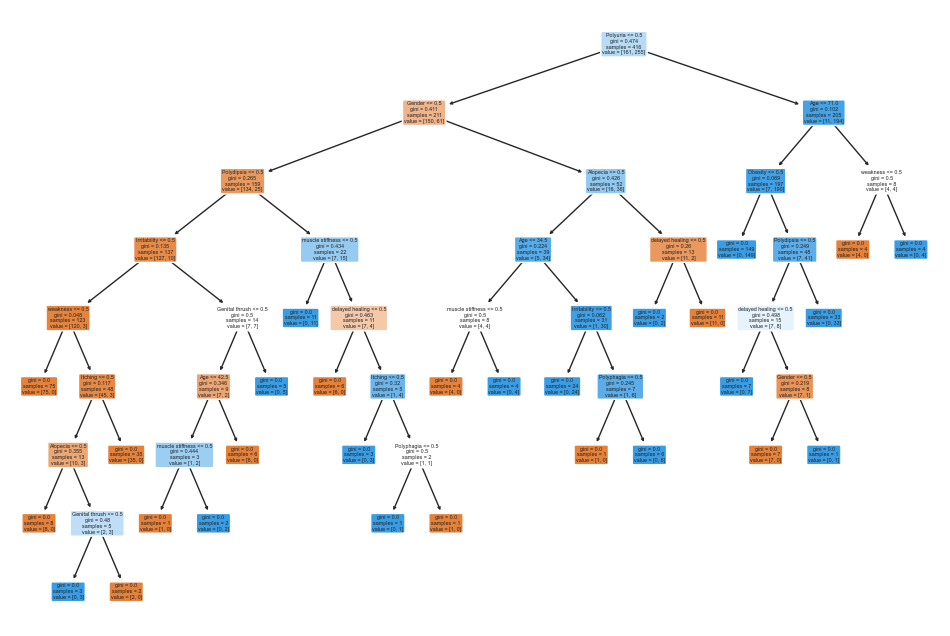

In [79]:
#Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns, rounded=True)
plt.show()

In [80]:
Model_evaluation

,Model,Accuracy Score,Precision Score,Recall,F1 Score
0,Logistic Regression_fm -Train,0.930288,0.941406,0.945098,0.943249
1,Logistic Regression_fm -Test,0.951923,0.968750,0.953846,0.961240
2,Gaussian Naive Bayes_fm -Train,0.884615,0.902724,0.909804,0.906250
3,Gaussian Naive Bayes_fm -Test,0.865385,0.869565,0.923077,0.895522
4,Decision Tree_fm -Train,1.000000,1.000000,1.000000,1.000000
5,Decision Tree_fm -Test,0.951923,0.968750,0.953846,0.961240


In [81]:
# Building models after dropping the unrelated columns to check wether it improves the model performance.

In [82]:
X=df.drop(['class','Itching','Obesity'],axis=1)
y=df['class']

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.80)

### Model : Logistic Regression

In [84]:
lr=LogisticRegression()

In [85]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [86]:
#Prediction on the train dataset
ypred_train=lr.predict(xtrain)

In [87]:
#Prediction on the test dataset
ypred_test=lr.predict(xtest)


In [88]:
#Updating the dataframe for the train performance
update_results('Logistic Regression_2 -Train',test=ytrain,pred=ypred_train)

In [89]:
#Updating the dataframe for the test performance
update_results('Logistic Regression_2 -Test',test=ytest,pred=ypred_test)

In [90]:
#Results from Logistic Regression
Model_evaluation[-2:]

,Model,Accuracy Score,Precision Score,Recall,F1 Score
6,Logistic Regression_2 -Train,0.935096,0.948413,0.944664,0.946535
7,Logistic Regression_2 -Test,0.884615,0.966102,0.850746,0.904762


### Model : Naive Bayes

In [91]:
nb=GaussianNB()

In [92]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [93]:
#Predicting the train dataset
ypred_train=nb.predict(xtrain)

In [94]:
#Predicting the test datset
ypred_test=nb.predict(xtest)

In [95]:
#Updating the dataframe for the train performance
update_results('Gaussian Naive Bayes_2 -Train',test=ytrain,pred=ypred_train)

In [96]:
#Updating the dataframe for the test performance
update_results('Gaussian Naive Bayes_2 -Test',test=ytest,pred=ypred_test)

In [97]:
#Results from Gaussian Naive Bayes
Model_evaluation.iloc[-2:,:]

,Model,Accuracy Score,Precision Score,Recall,F1 Score
8,Gaussian Naive Bayes_2 -Train,0.884615,0.911647,0.897233,0.904382
9,Gaussian Naive Bayes_2 -Test,0.913462,0.953125,0.910448,0.931298


### Model : Decision Tree

In [98]:
dt=DecisionTreeClassifier()

In [99]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [100]:
#Predictions from the train dataset
ypred_train=dt.predict(xtrain)

In [101]:
#Prediction from the test dataset
ypred_test=dt.predict(xtest)

In [102]:
#Updating the dataframe for the train performance
update_results('Decision Tree_2 -Train',test=ytrain,pred=ypred_train)

In [103]:
#Updating the dataframe for the train performance
update_results('Decision Tree_2 -Test',test=ytest,pred=ypred_test)

In [104]:
#Results from Decision Tree 
Model_evaluation.iloc[-2:,:]

,Model,Accuracy Score,Precision Score,Recall,F1 Score
10,Decision Tree_2 -Train,1.000000,1.000000,1.000000,1.000000
11,Decision Tree_2 -Test,0.923077,0.968254,0.910448,0.938462


## Model Selection.

In [105]:
Model_evaluation

,Model,Accuracy Score,Precision Score,Recall,F1 Score
0,Logistic Regression_fm -Train,0.930288,0.941406,0.945098,0.943249
1,Logistic Regression_fm -Test,0.951923,0.968750,0.953846,0.961240
2,Gaussian Naive Bayes_fm -Train,0.884615,0.902724,0.909804,0.906250
3,Gaussian Naive Bayes_fm -Test,0.865385,0.869565,0.923077,0.895522
4,Decision Tree_fm -Train,1.000000,1.000000,1.000000,1.000000
5,Decision Tree_fm -Test,0.951923,0.968750,0.953846,0.961240
6,Logistic Regression_2 -Train,0.935096,0.948413,0.944664,0.946535
7,Logistic Regression_2 -Test,0.884615,0.966102,0.850746,0.904762
8,Gaussian Naive Bayes_2 -Train,0.884615,0.911647,0.897233,0.904382
9,Gaussian Naive Bayes_2 -Test,0.913462,0.953125,0.910448,0.931298


* Final Observations:
    * Amongst the metrics chosen to evaluate the model ,Recall score is most suitable for the current problem statement.
    * This is due to the fact that False Negatives(Recall Score) pose greater health risk to the individuals than False               Positives(Precision Score).
    * The best performance in Recall Score is with decision tree, but both the models full model(fm) & model with related             variables are overfitted.
    * Though the performance of Logistic Regression_fm is same as the Logistic Regression_2 model in the train dataset, we will       be selecting the latter because it has better performance in the test dataset.
    * The final model for prediction is Logistic Regression_2 i.e. the model absent unrelated variables.
    

## Interpreting the Model.

In [106]:
model=lr.fit(xtrain,ytrain)

In [107]:
model.coef_

array([[-0.03549488,  2.55029918,  2.17089822,  2.98376135,  0.87871175,
         0.24615022,  0.40371772,  0.98947879, -0.11204853,  1.80493388,
        -0.80133848,  1.13127161,  0.29918629, -0.50618282]])

In [108]:
coeff=[]
for i in range(14):
    coeff.append(model.coef_[0][i])
    

In [109]:
#Creating a dataframe for saving the coefficients
df_coeff=pd.DataFrame(coeff,X.columns)

In [110]:
df_coeff

,0
Age,-0.035495
Gender,2.550299
Polyuria,2.170898
Polydipsia,2.983761
sudden weight loss,0.878712
weakness,0.246150
Polyphagia,0.403718
Genital thrush,0.989479
visual blurring,-0.112049
Irritability,1.804934


#### Regression Equation
* log(odds) = Bo  -0.030021 * Age + 2.431409 * Gender + 2.523097 * Polyuria......-0.327100*Alopecia

In [111]:
Exp=[]
for i in coeff:
    Exp.append(np.exp(i))
    

In [112]:
df_coeff['Exponents']=Exp

In [113]:
df_coeff

,0,Exponents
Age,-0.035495,0.965128
Gender,2.550299,12.810936
Polyuria,2.170898,8.766154
Polydipsia,2.983761,19.762009
sudden weight loss,0.878712,2.407796
weakness,0.246150,1.279092
Polyphagia,0.403718,1.497381
Genital thrush,0.989479,2.689832
visual blurring,-0.112049,0.894001
Irritability,1.804934,6.079569


* Interpretations : 
    * Keeping all factors constant, increasing the age by 1 year decreases the odds of getting diabetes by                             0.97.Alternatively,increasing the age by 1 year decreases the percent of getting diabetes by 3 percent.
    
    * Keeping all factors constant, a female individual's odds of getting diabetes is 11.37 compared to males.
    * The variable with the highest coefficient is Polydipsia.
    * Keeping all factors constant, for an individual with symptoms of Polydipsia the odds of getting diabetes is 17.84 compared       to an individual with no symptoms.
    
    

In [114]:
#Saving the model
import pickle
with open('Trained_model.pkl','wb') as file:
    pickle.dump(model,file)